## Фонин Максим Алексеевич, ИУ5-25М

## Лабораторная работа №1: «Data Storytelling»

**Задание**

Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

## Тема: «Как питательные вещества в продуктах влияют на калорийность и пользу для здоровья»

In [2]:
# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Загрузка датасета по инструкции kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cleaned_nutrition_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tharunmss/nutritional-breakdown-of-foods",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.shape

<ipython-input-2-28f22a26dc1c>:13: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 318k/318k [00:00<00:00, 1.60MB/s]


(3454, 13)

In [12]:
df.describe()

,Vitamin C,Vitamin B11,Sodium,Calcium,Carbohydrates,Iron,Caloric Value,Sugars,Dietary Fiber,Fat,Protein
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,9.501021,11.447140,141.437806,53.953960,18.724570,1.627954,227.591546,5.693513,2.157695,12.006807,10.819314
std,70.387542,33.849817,973.168394,103.339195,26.232674,4.384574,336.277025,13.136356,4.748876,26.726515,27.250089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029000,0.057000,4.647500,1.700000,0.200000,60.050000,0.000000,0.000000,0.500000,1.262500
50%,0.300000,0.075000,0.200000,21.940000,9.110000,0.700000,134.415000,0.920000,0.710000,4.105000,3.800000
75%,5.382500,4.327500,21.372500,60.600000,26.400000,1.600000,285.007500,5.207500,2.327500,12.500000,9.242500
max,3872.000000,550.520000,14174.590000,1283.500000,390.200000,121.200000,6077.000000,291.500000,76.500000,550.700000,560.300000


In [4]:
df.head(10)

,Vitamin C,Vitamin B11,Sodium,Calcium,Carbohydrates,food,Iron,Caloric Value,Sugars,Dietary Fiber,Fat,Protein,food_normalized
0,0.082,0.086,0.018,2.8,0.073,margarine with yoghurt,0.027,88.0,0.0,0.0,9.8,0.058,margarine with yoghurt
1,0.400,0.005,0.065,10.2,3.700,sunflower seed butter,0.700,99.0,1.7,0.9,8.8,2.800,sunflower seed butter
2,0.000,0.000,0.000,0.0,0.000,hazelnut oil,0.000,120.0,0.0,0.0,13.6,0.000,hazelnut oil
3,0.000,0.000,0.000,0.0,0.000,menhaden fish oil,0.000,1966.0,0.0,0.0,218.0,0.000,menhaden fish oil
4,0.000,0.000,0.000,0.0,0.000,cod liver fish oil,0.000,123.0,0.0,0.0,13.6,0.000,cod liver fish oil
5,0.000,0.000,0.000,0.0,0.000,sardine oil,0.000,123.0,0.0,0.0,13.6,0.000,sardine oil
6,0.000,0.000,0.000,0.0,0.000,cupu assu oil,0.000,120.0,0.0,0.0,13.6,0.000,cupu assu oil
7,0.000,0.000,0.000,0.0,0.000,lard,0.000,115.0,0.0,0.0,12.8,0.000,lard
8,0.000,0.002,0.031,153.6,3.800,sesame butter,3.100,94.0,0.0,0.9,8.1,2.900,sesame butter
9,0.000,0.067,0.019,0.6,0.100,margarine spread,0.078,59.0,0.0,0.0,6.7,0.082,margarine spread


Базовая информация о наборе данных:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vitamin C        3454 non-null   float64
 1   Vitamin B11      3454 non-null   float64
 2   Sodium           3454 non-null   float64
 3   Calcium          3454 non-null   float64
 4   Carbohydrates    3454 non-null   float64
 5   food             3454 non-null   object 
 6   Iron             3454 non-null   float64
 7   Caloric Value    3454 non-null   float64
 8   Sugars           3454 non-null   float64
 9   Dietary Fiber    3454 non-null   float64
 10  Fat              3454 non-null   float64
 11  Protein          3454 non-null   float64
 12  food_normalized  3454 non-null   object 
dtypes: float64(11), object(2)
memory usage: 350.9+ KB


<Axes: >

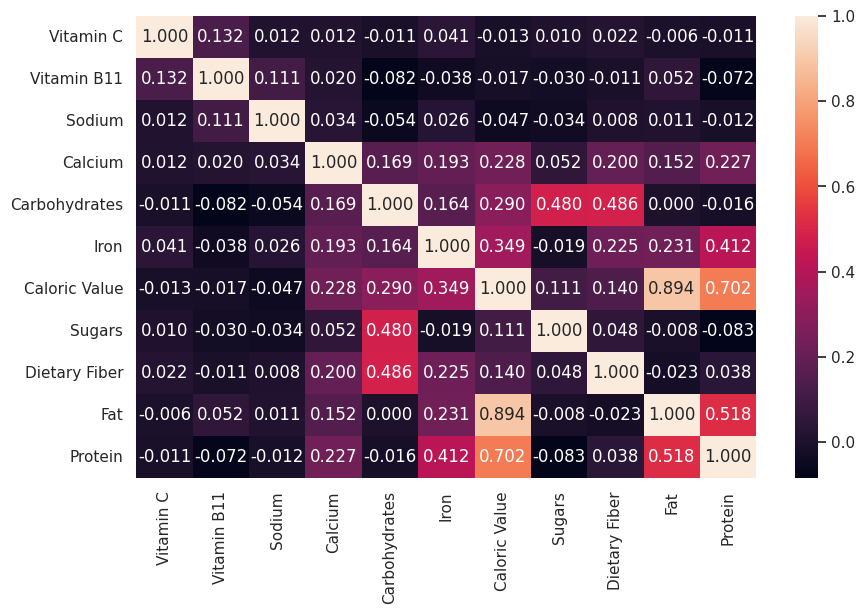

In [7]:
# Вывод значений в ячейках
new_data = df.drop(['food', 'food_normalized'], axis=1)
sns.heatmap(new_data.corr(), annot=True, fmt='.3f')

## Исследование распределения калорийности продуктов

### Пример неудачного графика
В наборе данных есть примеры с продуктами слишком высокой калорийности. Это выбросы, из-за чего гистограмма получилась малоиформативной

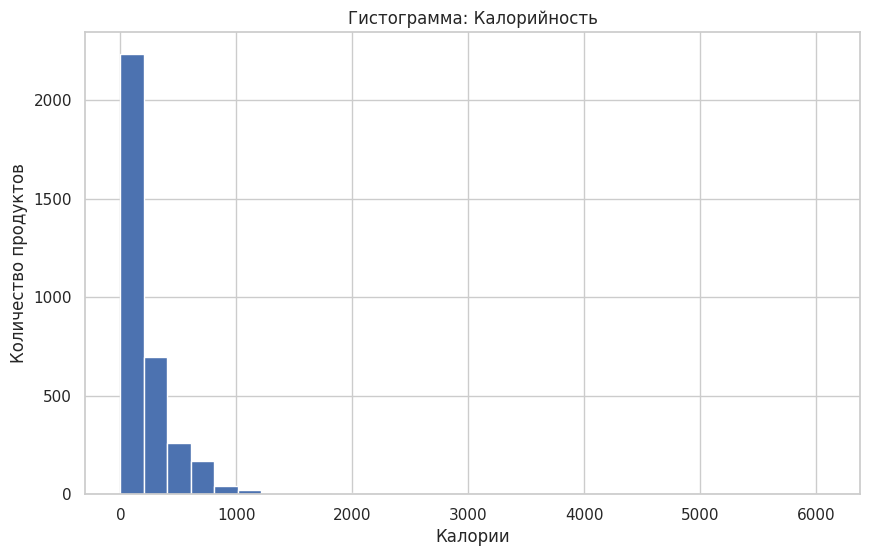

In [6]:
plt.hist(df['Caloric Value'], bins=30)
plt.title('Гистограмма: Калорийность')
plt.xlabel('Калории')
plt.ylabel('Количество продуктов')
plt.show()

### Удачный график
На прошлой диаграмме видно, что продуктов с калорийностью больше 1000 практически нет. Было принято решение обрезать их по оси X и сделать новую гистограмму.

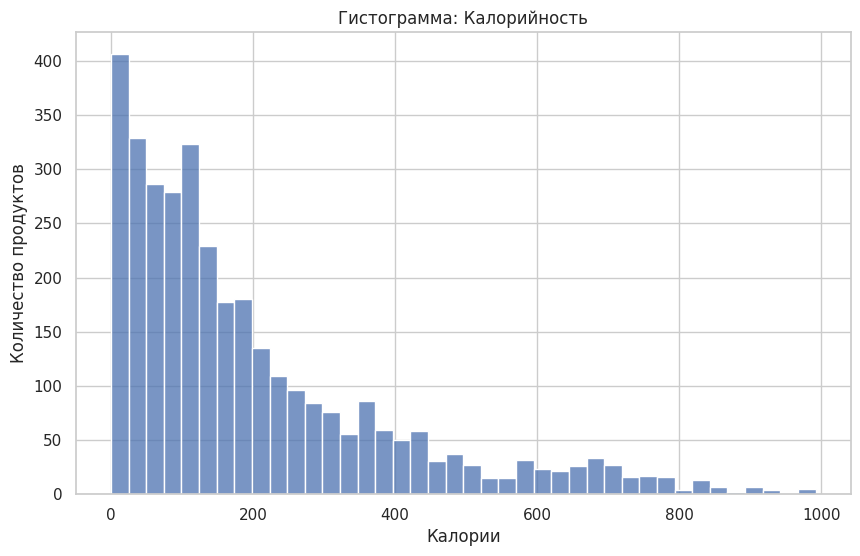

In [6]:
filtered = df[df['Caloric Value'] < 1000]
sns.histplot(filtered['Caloric Value'], bins=40)
plt.title('Гистограмма: Калорийность')
plt.xlabel('Калории')
plt.ylabel('Количество продуктов')
plt.show()

Из данной гистограммы можно сделать вывод, что большинство продуктов низкокалорийные

## Связь углеводов с калорийностью

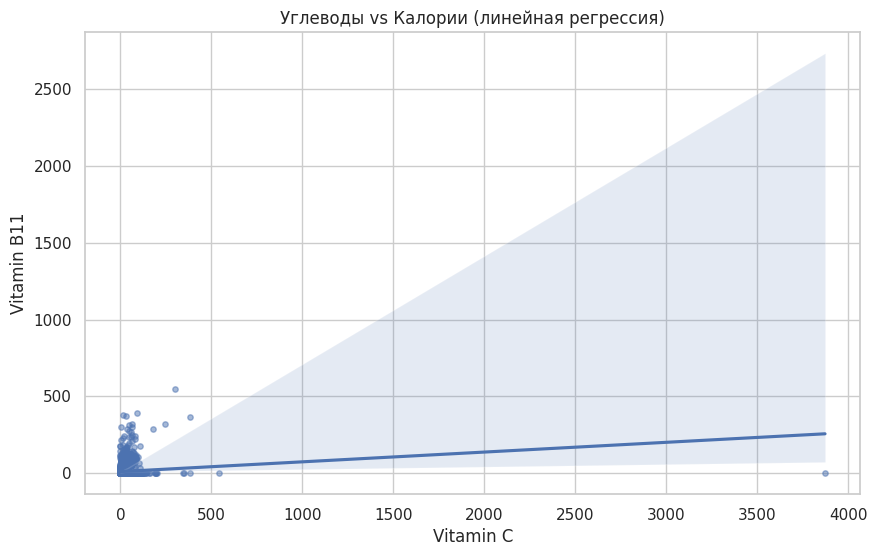

In [14]:
sns.regplot(x='Vitamin C', y='Vitamin B11', data=df, scatter_kws={'s': 15, 'alpha': 0.5})
plt.title('Углеводы vs Калории (линейная регрессия)')
plt.show()

График содержит много точек, что приводит к понятию "overplotting". Улучшить ситуацию может помочь уменьшение размера точек, но в данном случае это не сильно помогло.

In [7]:
corr = df['Carbohydrates'].corr(df['Caloric Value'])
f'Коэффициент корреляции: {corr:.2f}'

'Коэффициент корреляции: 0.29'

График и коэффициент корреляции показывают, что между углеводами и калорийностью есть умеренная положительная корреляция.

## Сравнение кальция по группам калорийности

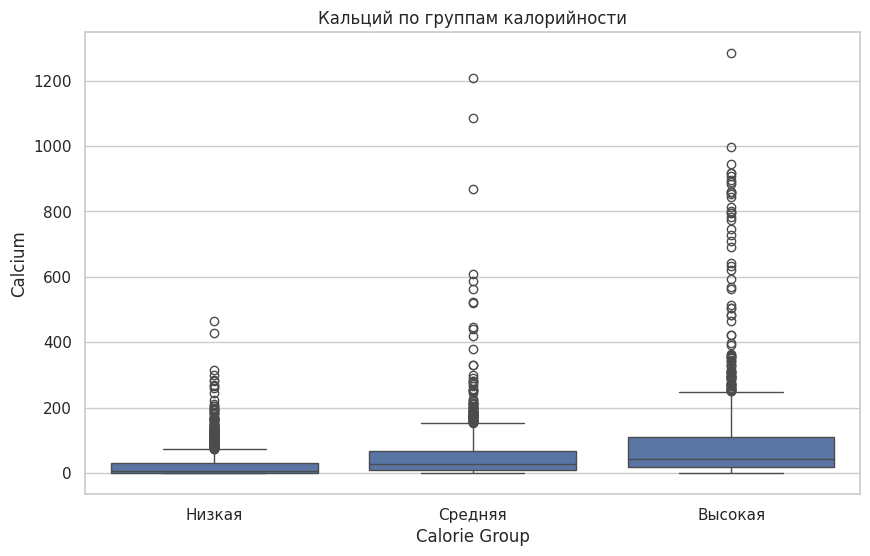

In [8]:
df['Calorie Group'] = pd.cut(df['Caloric Value'], bins=[0,100,300,10000], labels=['Низкая','Средняя','Высокая'])
sns.boxplot(x='Calorie Group', y='Calcium', data=df)
plt.title('Кальций по группам калорийности')
plt.show()

Ящик с усами показывает:
* Медиану (горизонтальная линия в середине ящика)
* 25% и 75% квартиль (границы ящика)
* «Усы» — минимальные и максимальные значения без выбросов
* Выбросы — точки вне «усов»

Продукты вручную разделены на группы по калорийности, чтобы сравнить кальций по группам, а не по всем значениям калорийности сразу — иначе было бы слишком шумно.

На графике видно:
* У высококалорийных продуктов распределение кальция сместилось вверх.
* Низкокалорийные продукты — обычно с низким содержанием кальция.
* Разброс внутри группы — видно, что он выше у высококалорийных.

**Вывод**

Продукты с большей энергетической ценностью в среднем содержат больше кальция, но и разброс больше. Возможно, это связано с присутствием молочных или обогащённых продуктов.

## Плотность распределения витаминов B11 и C

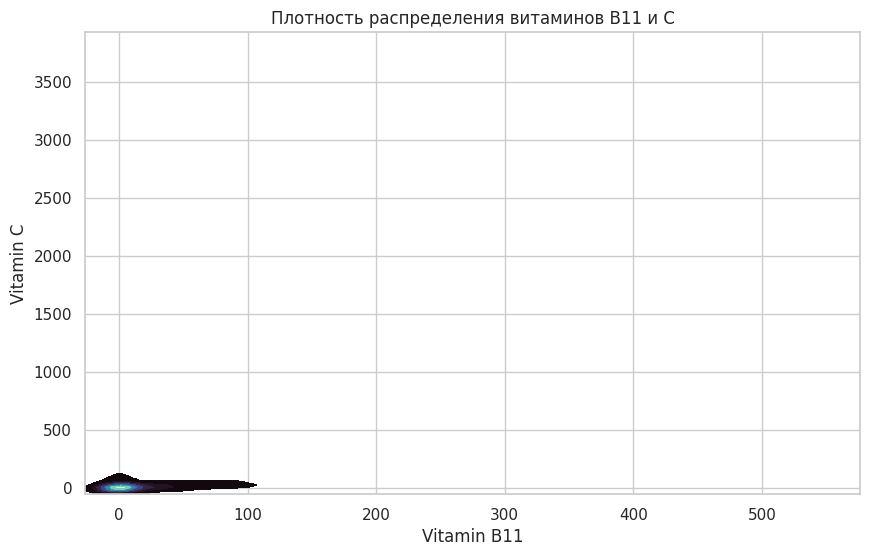

In [9]:
sns.kdeplot(data=df, x="Vitamin B11", y="Vitamin C", fill=True, cmap="mako")
plt.title("Плотность распределения витаминов B11 и C")
plt.show()

Видна высокая плотность в области малых значений, но график неинформативен.

Можно "растянуть" график, прологарифмировав значения.

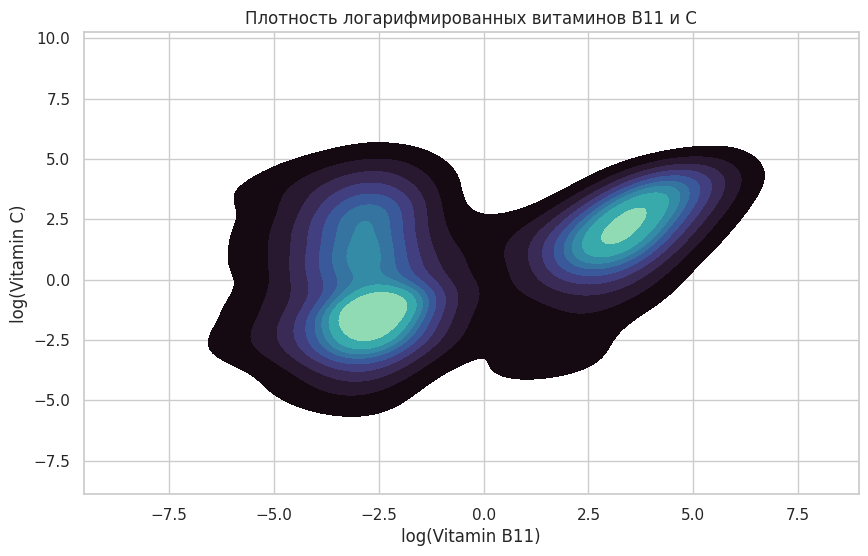

In [10]:
df_vit = df[(df['Vitamin B11'] > 0) & (df['Vitamin C'] > 0)].copy()
df_vit['log_B11'] = np.log(df_vit['Vitamin B11'])
df_vit['log_C'] = np.log(df_vit['Vitamin C'])

sns.kdeplot(data=df_vit, x="log_B11", y="log_C", fill=True, cmap="mako")
plt.title("Плотность логарифмированных витаминов B11 и C")
plt.xlabel("log(Vitamin B11)")
plt.ylabel("log(Vitamin C)")
plt.show()

График представляет контурные линии плотности логарифмированных значений витаминов B11 и C. Он показывает, где сконцентрированы данные — плотные области обозначены светлыми цветами, менее плотные — темными.

**Выводы**
* Видны две четко выраженные зоны плотности — это значит, что большинство продуктов попадает либо в область низких значений витаминов B11 и C, либо в область умеренно высоких.
* График также визуально подтверждает положительную зависимость между количеством витамина B11 и C: чем больше одного — тем чаще встречается и второй.

## Попытка кластеризации продуктов

### Интерактивный scatter с Plotly

In [11]:
fig = px.scatter(df, x="Carbohydrates", y="Caloric Value", color="Calorie Group", hover_data=['food'])
fig.update_layout(title="Продукты по калориям и углеводам")
fig.show()

## Распределение сахара по группам калорийности

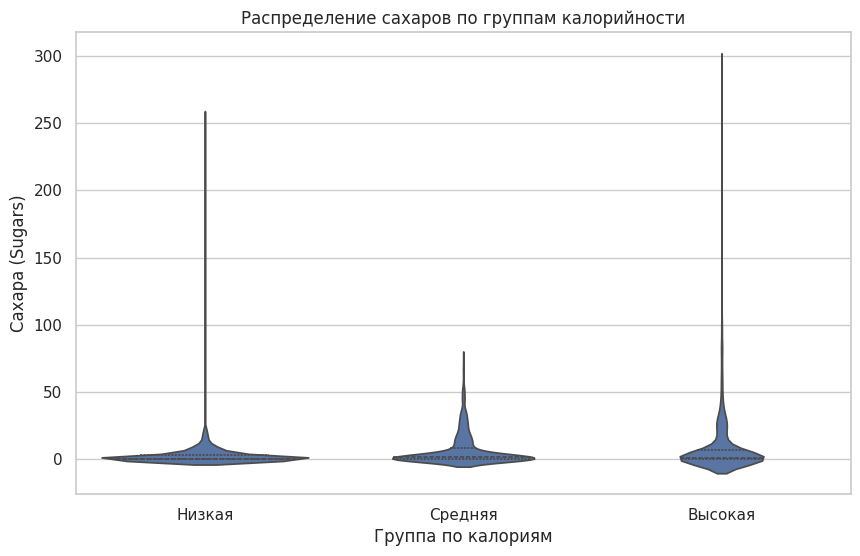

In [12]:
sns.violinplot(x='Calorie Group', y='Sugars', data=df, inner='quartile')
plt.title('Распределение сахаров по группам калорийности')
plt.xlabel('Группа по калориям')
plt.ylabel('Сахара (Sugars)')
plt.show()

Violin plot сочетает в себе boxplot и плотность распределения. Ширина фигуры показывает, сколько наблюдений соответствует этому значению. Если скрипка шире у нижней границы — значит, много продуктов с низким содержанием сахара.

**Вывод**

В низкокалорийной группе сахара почти не содержатся, тогда как в высококалорийной — больше вариативность и наличие экстремальных значений

## Вывод по лабораторной работе

В результате анализа набора данных о пищевой ценности продуктов с использованием различных методов визуализации и методологии data-to-viz, были сделаны следующие выводы:

* Калорийность большинства продуктов невысока, что подтверждается как визуально, так и статистически. Это позволяет предположить, что большинство представленных продуктов относятся к категории легких или диетических.

* Углеводы вносят вклад в калорийность: наблюдается умеренная положительная корреляция между содержанием углеводов и калорийностью, что логично с точки зрения пищевой химии.

* Кальций чаще встречается в высококалорийных продуктах, что может говорить о содержании молочных или обогащённых продуктов в этой группе.

* Содержание витаминов B11 и C демонстрирует кластеризацию. После логарифмирования видно два четких скопления, что может указывать на различные классы или категории продуктов.

* Сахар в значительной степени варьируется по группам калорийности. В низкокалорийных продуктах его практически нет, а в высококалорийных — наблюдается высокая вариативность и наличие экстремальных значений.

Методология data-to-viz позволяет подобрать адекватные визуальные средства для каждого типа данных, избегать типичные ошибки и получить понятные, наглядные результаты. Это делает визуальный анализ мощным инструментом для предварительного исследования.